In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_classification
from matplotlib import style
style.use('fivethirtyeight')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
df = pd.DataFrame(data = X,columns= ['C1','C2'])
df['Class'] = y
df.sample(10)

,C1,C2,Class
2843,0.197113,0.797598,0
6594,0.137535,0.382332,0
47,1.258227,1.245063,0
791,1.225661,0.933398,0
2236,0.373691,0.662557,0
4128,1.243545,1.087318,0
5516,0.009909,0.141980,0
5596,0.798099,0.740355,0
7408,0.632304,0.909197,0
9935,2.496931,1.765243,0


In [21]:
df['Class'].value_counts()

0    9900
1     100
Name: Class, dtype: int64

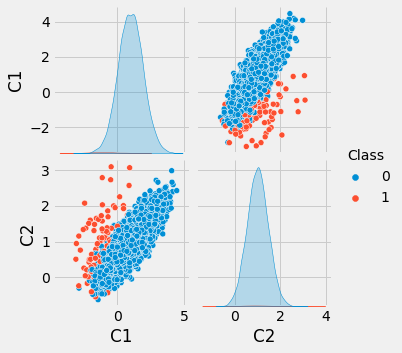

In [22]:
sns.pairplot(df,hue='Class')
plt.show()

In [23]:
df.describe()

,C1,C2,Class
count,10000.000000,10000.000000,10000.000000
mean,0.966733,0.997252,0.010000
std,0.950270,0.467640,0.099504
min,-3.091974,-0.622193,0.000000
25%,0.335374,0.686097,0.000000
50%,0.965995,0.998290,0.000000
75%,1.605024,1.307164,0.000000
max,4.447943,3.087821,1.000000


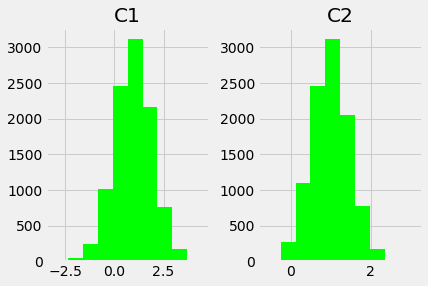

In [24]:
df.drop('Class',axis=1).hist( color = 'lime')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


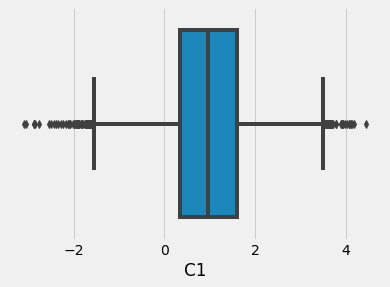

In [25]:
sns.boxplot(df['C1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


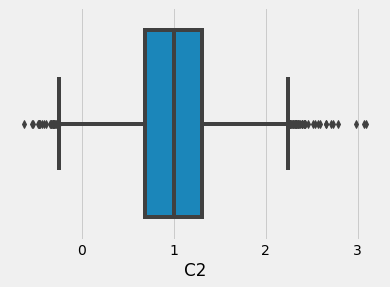

In [26]:
sns.boxplot(df['C2'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


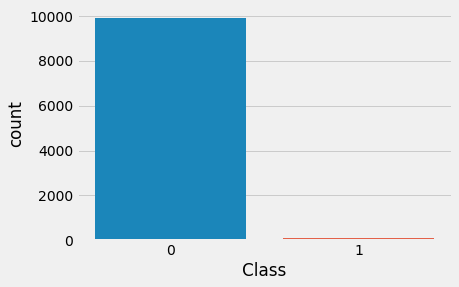

In [27]:
sns.countplot(df['Class'])
plt.show()

In [28]:
#@title Smoting
'''Smoting'''
!pip install imbalanced-learn
import imblearn.over_sampling as  ovs

In [30]:
oversample = ovs.SMOTE()
X,y = oversample.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


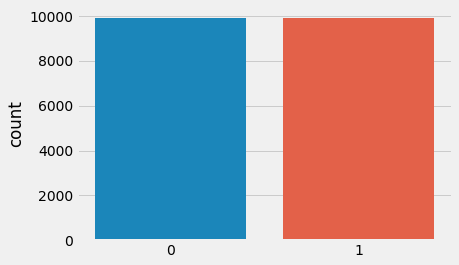

In [31]:
sns.countplot(y)
plt.show()

In [32]:
data = pd.DataFrame(data = X,columns= ['C1','C2'])
data['Class'] = y
data['Class'].value_counts()

1    9900
0    9900
Name: Class, dtype: int64

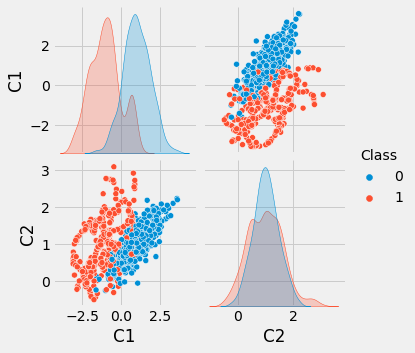

In [33]:
sns.pairplot(data.sample(1000),hue = 'Class')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 80/100, random_state = 100)

In [42]:
svc = SVC()
lg = LogisticRegression() 
knn = KNeighborsClassifier(n_neighbors = 4)
# k_range = list(range(2,15))
# param_grid = dict(n_neighbors = k_range)
# grid = GridSearchCV(knn, param_grid, cv =10, scoring = 'accuracy')
# grid_search = grid.fit(X_train, y_train)

In [43]:
# grid_search.best_params_

In [44]:
svc.fit(X_train, y_train)
lg.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [53]:
output = pd.DataFrame(data = [
                              [f'{round(accuracy_score(svc.predict(X_test), y_test)*100,2)} %'],
                               [f'{round(accuracy_score(lg.predict(X_test), y_test)*100,2)} %'],
                               [f'{round(accuracy_score(knn.predict(X_test), y_test)*100,2)} %']
                              ], index = ['SVM','Logistic','KNN'],columns = ['Accuracy'])
output

,Accuracy
SVM,91.69 %
Logistic,90.96 %
KNN,94.19 %


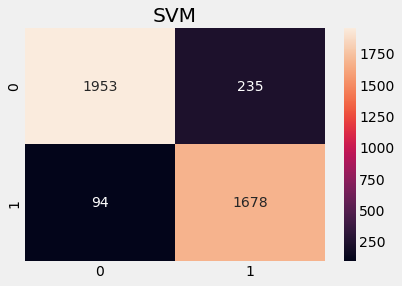

In [59]:
sns.heatmap(confusion_matrix(svc.predict(X_test), y_test),annot= True,fmt = 'd')
plt.title('SVM')
plt.show()

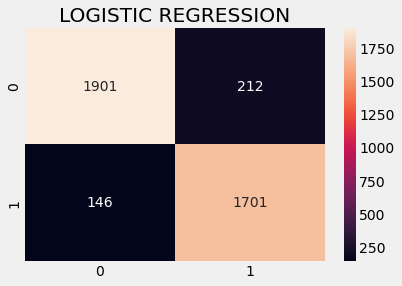

In [61]:
sns.heatmap(confusion_matrix(lg.predict(X_test), y_test),annot= True,fmt = 'd')
plt.title('LOGISTIC REGRESSION')
plt.show()

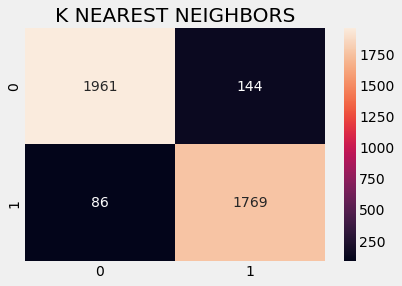

In [62]:
sns.heatmap(confusion_matrix(knn.predict(X_test), y_test),annot= True,fmt = 'd')
plt.title('K NEAREST NEIGHBORS')
plt.show()